# Simulação de Órbitas Planetárias - Série de Fourier

In [11]:
# Instalar todas as bibliotecas necessárias
%pip install numpy>=1.20.0 matplotlib>=3.3.0 pandas>=1.3.0 astropy>=5.0.0 jplephem>=2.15 -q

Note: you may need to restart the kernel to use updated packages.


## Biblioteca de Simulação

In [17]:
"""
Biblioteca para simulação de órbitas planetárias usando Série de Fourier
"""
import numpy as np
import matplotlib.pyplot as plt


# Parâmetros dos planetas
# Fonte: TCC - Tabela 1
PLANET_DATA = {
    'Marte': {
        'semi_major': 1.524,
        'ecc': 0.0934,
        'period': 686.98,  # em dias
        'color': 'red'
    },
    'Vênus': {
        'semi_major': 0.723,
        'ecc': 0.0068,
        'period': 224.7,  # em dias
        'color': 'orange'
    },
    'Mercúrio': {
        'semi_major': 0.387,
        'ecc': 0.2056,
        'period': 87.97,  # em dias
        'color': 'gray'
    }
}


def calculate_real_orbit(semi_major, ecc, num_points=1000):
    """
    Calcula as coordenadas x e y de uma órbita elíptica.
    
    Args:
        semi_major: Semi-eixo maior da órbita (em UA)
        ecc: Excentricidade da órbita
        num_points: Número de pontos para calcular a órbita
        
    Returns:
        tuple: (x, y, r) - coordenadas cartesianas e raio
    """
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = semi_major * (1 - ecc**2) / (1 + ecc * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, r


def calculate_fourier_coefficients(x_real, y_real, num_terms):
    """
    Calcula os coeficientes de Fourier a_n, b_n, c_n e d_n
    a partir das coordenadas da órbita real.
    
    Args:
        x_real: Array com coordenadas x da órbita real
        y_real: Array com coordenadas y da órbita real
        num_terms: Número de termos da série de Fourier
        
    Returns:
        tuple: (a_n, b_n, c_n, d_n) - coeficientes de Fourier
    """
    num_points = len(x_real)
    time = np.linspace(0, 2 * np.pi, num_points)

    a_n = np.zeros(num_terms + 1)
    b_n = np.zeros(num_terms + 1)
    c_n = np.zeros(num_terms + 1)
    d_n = np.zeros(num_terms + 1)

    # Coeficientes para n = 0 (média)
    a_n[0] = np.mean(x_real)
    c_n[0] = np.mean(y_real)

    # Coeficientes para n > 0
    for n in range(1, num_terms + 1):
        a_n[n] = (2 / num_points) * np.sum(x_real * np.cos(n * time))
        b_n[n] = (2 / num_points) * np.sum(x_real * np.sin(n * time))
        c_n[n] = (2 / num_points) * np.sum(y_real * np.cos(n * time))
        d_n[n] = (2 / num_points) * np.sum(y_real * np.sin(n * time))

    return a_n, b_n, c_n, d_n


def reconstruct_fourier_orbit(a_n, b_n, c_n, d_n, num_terms, num_points=1000):
    """
    Reconstrói a órbita usando os coeficientes de Fourier.
    
    Args:
        a_n, b_n, c_n, d_n: Coeficientes de Fourier
        num_terms: Número de termos da série de Fourier
        num_points: Número de pontos para reconstruir a órbita
        
    Returns:
        tuple: (x_fourier, y_fourier) - coordenadas da órbita reconstruída
    """
    time = np.linspace(0, 2 * np.pi, num_points)
    x_fourier = a_n[0] * np.ones_like(time)
    y_fourier = c_n[0] * np.ones_like(time)

    for n in range(1, num_terms + 1):
        x_fourier += a_n[n] * np.cos(n * time) + b_n[n] * np.sin(n * time)
        y_fourier += c_n[n] * np.cos(n * time) + d_n[n] * np.sin(n * time)

    return x_fourier, y_fourier


def simulate_and_plot(planet_name, num_terms=3):
    """
    Função principal para simular e plotar as órbitas.
    
    Args:
        planet_name: Nome do planeta ('Marte', 'Vênus' ou 'Mercúrio')
        num_terms: Número de termos da série de Fourier (padrão: 3)
    """
    if planet_name not in PLANET_DATA:
        raise ValueError(f"Planeta '{planet_name}' não encontrado. Escolha entre: {list(PLANET_DATA.keys())}")
    
    pdata = PLANET_DATA[planet_name]

    # Gerar a órbita real
    x_real, y_real, r_real = calculate_real_orbit(pdata['semi_major'], pdata['ecc'])

    # Calcular os coeficientes de Fourier a partir da órbita real
    a_n, b_n, c_n, d_n = calculate_fourier_coefficients(x_real, y_real, num_terms)

    # Reconstruir a órbita de Fourier
    x_fourier, y_fourier = reconstruct_fourier_orbit(a_n, b_n, c_n, d_n, num_terms)

    # Plotar as órbitas
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x_real, y_real, label='Órbita Real', color=pdata['color'], linewidth=2)
    ax.plot(x_fourier, y_fourier, '--', label=f'Fourier ({num_terms} termos)', color='black', linewidth=2)
    ax.plot(0, 0, 'o', color='gold', markersize=10, label='Sol')

    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'Órbitas de {planet_name} (Aproximação por Fourier)', fontsize=16)
    ax.set_xlabel('X (UA)')
    ax.set_ylabel('Y (UA)')
    ax.legend()
    ax.grid(True)
    plt.show()


## Informações dos Planetas Disponíveis

In [18]:
# Listar planetas disponíveis
print("=" * 60)
print("Planetas disponíveis:")
print("=" * 60)
for i, planet in enumerate(PLANET_DATA.keys(), 1):
    data = PLANET_DATA[planet]
    print(f"  {i}. {planet}")
    print(f"     - Semi-eixo maior: {data['semi_major']} UA")
    print(f"     - Excentricidade: {data['ecc']:.4f}")
    print(f"     - Período: {data['period']} dias")
    print()


Planetas disponíveis:
  1. Marte
     - Semi-eixo maior: 1.524 UA
     - Excentricidade: 0.0934
     - Período: 686.98 dias

  2. Vênus
     - Semi-eixo maior: 0.723 UA
     - Excentricidade: 0.0068
     - Período: 224.7 dias

  3. Mercúrio
     - Semi-eixo maior: 0.387 UA
     - Excentricidade: 0.2056
     - Período: 87.97 dias



## Interface CLI

🪐 Simulação de Órbitas Planetárias - Série de Fourier 🪐

Planetas disponíveis:
  1. Marte (excentricidade: 0.0934)
  2. Vênus (excentricidade: 0.0068)
  3. Mercúrio (excentricidade: 0.2056)


Você escolheu: Marte


Usando 3 termos na série de Fourier

Gerando simulação...


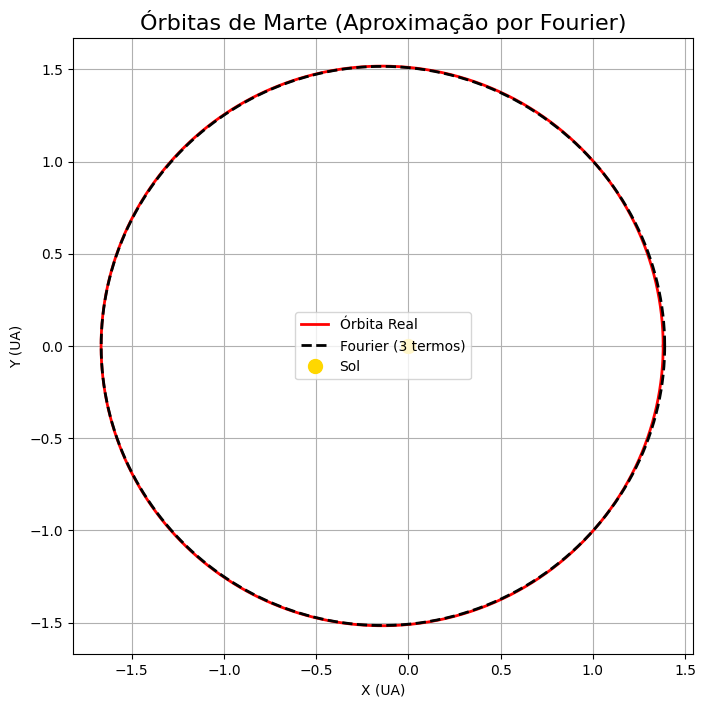


✅ Simulação concluída! Feche a janela do gráfico para continuar.


In [15]:
# Interface CLI para simulação
print("=" * 60)
print("🪐 Simulação de Órbitas Planetárias - Série de Fourier 🪐")
print("=" * 60)
print()

# Listar planetas disponíveis
print("Planetas disponíveis:")
for i, planet in enumerate(PLANET_DATA.keys(), 1):
    data = PLANET_DATA[planet]
    print(f"  {i}. {planet} (excentricidade: {data['ecc']:.4f})")
print()

# Escolher planeta
while True:
    try:
        choice = input("Escolha um planeta (1-3): ").strip()
        planet_idx = int(choice) - 1
        planet_list = list(PLANET_DATA.keys())
        
        if 0 <= planet_idx < len(planet_list):
            planet_name = planet_list[planet_idx]
            break
        else:
            print("!! Erro: Opção inválida! Escolha entre 1 e 3.")
    except ValueError:
        print("!! Erro: Por favor, digite um número válido.")
    except KeyboardInterrupt:
        print("\n\n👋 Até logo!")
        raise

print(f"\nVocê escolheu: {planet_name}")
print()

# Escolher número de termos
while True:
    try:
        num_terms = input("Digite o número de termos de Fourier (recomendado: 3-10): ").strip()
        num_terms = int(num_terms)
        
        if num_terms < 1:
            print("!! Erro: O número de termos deve ser pelo menos 1.")
        elif num_terms > 50:
            print("!! Cuidado: Muitos termos podem deixar o gráfico lento.")
            confirm = input("Deseja continuar? (s/n): ").strip().lower()
            if confirm == 's':
                break
        else:
            break
    except ValueError:
        print("!! Erro: Por favor, digite um número válido.")
    except KeyboardInterrupt:
        print("\n\n👋 Até logo!")
        raise

print(f"\nUsando {num_terms} termos na série de Fourier")
print("\nGerando simulação...")

# Executar simulação
try:
    simulate_and_plot(planet_name, num_terms)
    print("\n✅ Simulação concluída! Feche a janela do gráfico para continuar.")
except Exception as e:
    print(f"\n!! Erro ao gerar simulação: {e}")


## Modo Alternativo: Execução Direta
Você também pode executar a simulação diretamente modificando as variáveis abaixo:

🪐 Simulando órbita de Marte com 3 termos de Fourier...


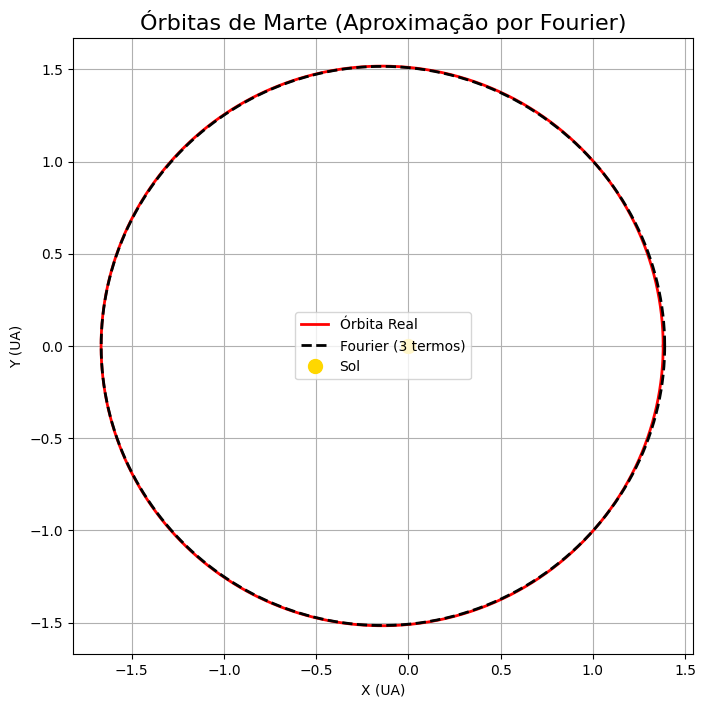

✅ Simulação concluída!


In [16]:
# Configuração direta (modifique estas variáveis)
PLANETA_ESCOLHIDO = 'Marte'  # Opções: 'Marte', 'Vênus', 'Mercúrio'
NUM_TERMOS = 3  # Número de termos da série de Fourier (recomendado: 3-10)

# Executar simulação
print(f"🪐 Simulando órbita de {PLANETA_ESCOLHIDO} com {NUM_TERMOS} termos de Fourier...")
simulate_and_plot(PLANETA_ESCOLHIDO, NUM_TERMOS)
print("✅ Simulação concluída!")
